# Analyzing the Impact of a New Training Program on Employee Performance

Dataset: Human Resources Analytics

Task: Determine if undergoing training (as indicated in the dataset) leads to higher last evaluation scores using a paired sample t-test.

In [279]:
import pandas as pd
from scipy import stats

In [280]:
data=pd.read_csv("Hr_data.csv")

In [281]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,last_evaluation_score
0,3,Operations,region_22,Master's & above,f,other,1,38,5.0,4,1,0,67,0.73
1,6,Operations,region_15,Bachelor's,f,other,1,38,3.0,10,0,0,50,0.76
2,11,Sales & Marketing,region_4,Master's & above,f,sourcing,1,39,4.0,12,1,0,72,0.58
3,13,Operations,region_17,Bachelor's,m,other,1,38,1.0,5,1,0,47,0.39
4,16,Operations,region_4,Master's & above,m,sourcing,1,40,5.0,5,0,0,53,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,78280,Analytics,region_7,Bachelor's,m,sourcing,2,30,NaN,1,0,0,51,1.00
23486,78283,Procurement,region_12,Bachelor's,f,sourcing,1,28,3.0,4,0,0,57,0.84
23487,78284,Technology,region_22,Bachelor's,m,referred,1,33,3.0,5,1,1,82,0.62
23488,78293,Sales & Marketing,region_27,Bachelor's,f,other,1,26,3.0,3,1,0,64,0.87


## Setting up Hypothesis

Null Hypothesis -> H0 : There is no significant difference between the evaluation scores before and after the training

Alternate Hypothesis -> H1 : There is a significant difference between the evaluation scores before and after the training

In [282]:
data=data.dropna()

In [283]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,last_evaluation_score
0,3,Operations,region_22,Master's & above,f,other,1,38,5.0,4,1,0,67,0.73
1,6,Operations,region_15,Bachelor's,f,other,1,38,3.0,10,0,0,50,0.76
2,11,Sales & Marketing,region_4,Master's & above,f,sourcing,1,39,4.0,12,1,0,72,0.58
3,13,Operations,region_17,Bachelor's,m,other,1,38,1.0,5,1,0,47,0.39
4,16,Operations,region_4,Master's & above,m,sourcing,1,40,5.0,5,0,0,53,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23484,78279,Sales & Marketing,region_31,Master's & above,m,sourcing,1,37,5.0,7,1,0,57,0.52
23486,78283,Procurement,region_12,Bachelor's,f,sourcing,1,28,3.0,4,0,0,57,0.84
23487,78284,Technology,region_22,Bachelor's,m,referred,1,33,3.0,5,1,1,82,0.62
23488,78293,Sales & Marketing,region_27,Bachelor's,f,other,1,26,3.0,3,1,0,64,0.87


In [284]:
data.describe

<bound method NDFrame.describe of        employee_id         department     region         education gender  \
0                3         Operations  region_22  Master's & above      f   
1                6         Operations  region_15        Bachelor's      f   
2               11  Sales & Marketing   region_4  Master's & above      f   
3               13         Operations  region_17        Bachelor's      m   
4               16         Operations   region_4  Master's & above      m   
...            ...                ...        ...               ...    ...   
23484        78279  Sales & Marketing  region_31  Master's & above      m   
23486        78283        Procurement  region_12        Bachelor's      f   
23487        78284         Technology  region_22        Bachelor's      m   
23488        78293  Sales & Marketing  region_27        Bachelor's      f   
23489        78295         Operations  region_14        Bachelor's      f   

      recruitment_channel  no_of_training

### Performing normalization of previous_year_rating

Scale of previous_year_rating will be matched with scale of last_evaluation_score 

In [285]:
print(data['previous_year_rating'].min())
print(data['previous_year_rating'].max())
print(data['last_evaluation_score'].min())
print(data['last_evaluation_score'].max())

1.0
5.0
0.36
1.0


In [286]:
data['department'].value_counts()

department
Sales & Marketing    6450
Operations           4234
Technology           2692
Procurement          2668
Analytics            2057
HR                    976
Finance               958
Legal                 397
R&D                   387
Name: count, dtype: int64

In [287]:
data['new_prev']=(data['previous_year_rating']-data['previous_year_rating'].mean())/(data['previous_year_rating'].std())

C:\Users\vinot\AppData\Local\Temp\ipykernel_2764\685914718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['new_prev']=(data['previous_year_rating']-data['previous_year_rating'].mean())/(data['previous_year_rating'].std())


In [288]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,last_evaluation_score,new_prev
0,3,Operations,region_22,Master's & above,f,other,1,38,5.0,4,1,0,67,0.73,1.308394
1,6,Operations,region_15,Bachelor's,f,other,1,38,3.0,10,0,0,50,0.76,-0.276078
2,11,Sales & Marketing,region_4,Master's & above,f,sourcing,1,39,4.0,12,1,0,72,0.58,0.516158
3,13,Operations,region_17,Bachelor's,m,other,1,38,1.0,5,1,0,47,0.39,-1.860551
4,16,Operations,region_4,Master's & above,m,sourcing,1,40,5.0,5,0,0,53,0.58,1.308394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23484,78279,Sales & Marketing,region_31,Master's & above,m,sourcing,1,37,5.0,7,1,0,57,0.52,1.308394
23486,78283,Procurement,region_12,Bachelor's,f,sourcing,1,28,3.0,4,0,0,57,0.84,-0.276078
23487,78284,Technology,region_22,Bachelor's,m,referred,1,33,3.0,5,1,1,82,0.62,-0.276078
23488,78293,Sales & Marketing,region_27,Bachelor's,f,other,1,26,3.0,3,1,0,64,0.87,-0.276078


### Performing Paired sample t-test on Analytics department

In [289]:
analytics=data[(data.department=="Analytics") & (data.no_of_trainings==1)]
analytics_bef=analytics['new_prev'].sample(n=29)
analytics_aft=analytics['last_evaluation_score'].sample(n=29)

In [290]:
tana,p_ana=stats.ttest_rel(analytics_bef,analytics_aft)

In [291]:
print("tstatistic value is : ",tstatistic)
print("p_value  is : ",p_ana)

tstatistic value is :  -3.788769516266795
p_value  is :  0.07249861757831698


In [292]:
if p_ana<0.05:
    print("We reject the null hypothesis (i.e) There is a significant difference between the evaluation scores before and after the training")
else:
    print("We fail to reject the null hypothesis (i.e) There is no significant difference between the evaluation scores before and after the training")

We fail to reject the null hypothesis (i.e) There is no significant difference between the evaluation scores before and after the training


### Performing Paired sample t-test on Finance department

In [293]:
finance=data[(data.department=="Finance") & (data.no_of_trainings==1)]
finance_bef=finance['new_prev'].sample(n=29)
finance_aft=finance['last_evaluation_score'].sample(n=29)

In [294]:
tfin,p_fin=stats.ttest_rel(finance_bef,finance_aft)

In [295]:
print("tstatistic value is : ",tstatistic)
print("p_value  is : ",p_fin)

tstatistic value is :  -3.788769516266795
p_value  is :  6.062615748171395e-05


In [296]:
if p_fin<0.05:
    print("We reject the null hypothesis (i.e) There is a significant difference between the evaluation scores before and after the training")
else:
    print("We fail to reject the null hypothesis (i.e) There is no significant difference between the evaluation scores before and after the training")

We reject the null hypothesis (i.e) There is a significant difference between the evaluation scores before and after the training


### Performing Paired sample t-test on Legal department

In [297]:
Legal=data[(data.department=="Finance") & (data.no_of_trainings==1)]
Legal_bef=Legal['new_prev'].sample(n=29)
Legal_aft=Legal['last_evaluation_score'].sample(n=29)

In [298]:
tleg,p_leg=stats.ttest_rel(Legal_bef,Legal_aft)

In [299]:
print("tstatistic value is : ",tstatistic)
print("p_value  is : ",p_leg)

tstatistic value is :  -3.788769516266795
p_value  is :  7.254111334301897e-05


In [300]:
if p_leg<0.05:
    print("We reject the null hypothesis (i.e) There is a significant difference between the evaluation scores before and after the training")
else:
    print("We fail to reject the null hypothesis (i.e) There is no significant difference between the evaluation scores before and after the training")

We reject the null hypothesis (i.e) There is a significant difference between the evaluation scores before and after the training


### Performing Paired sample t-test on Operations department

In [301]:
Operations=data[(data.department=="Operations") & (data.no_of_trainings==1)]
Operations_bef=Operations['new_prev'].sample(n=29)
Operations_aft=Operations['last_evaluation_score'].sample(n=29)

In [302]:
tope,p_ope=stats.ttest_rel(Operations_bef,Operations_aft)

In [303]:
print("tstatistic value is : ",tstatistic)
print("p_value  is : ",p_ope)

tstatistic value is :  -3.788769516266795
p_value  is :  0.016048831412904863


In [304]:
if p_ope<0.05:
    print("We reject the null hypothesis (i.e) There is a significant difference between the evaluation scores before and after the training")
else:
    print("We fail to reject the null hypothesis (i.e) There is no significant difference between the evaluation scores before and after the training")

We reject the null hypothesis (i.e) There is a significant difference between the evaluation scores before and after the training


### Performing Paired sample t-test on HR department

In [305]:
HR=data[(data.department=="HR") & (data.no_of_trainings==1)]
HR_bef=Operations['new_prev'].sample(n=29)
HR_aft=Operations['last_evaluation_score'].sample(n=29)

In [306]:
thr,p_hr=stats.ttest_rel(HR_bef,HR_aft)

In [307]:
print("tstatistic value is : ",tstatistic)
print("p_value  is : ",p_hr)

tstatistic value is :  -3.788769516266795
p_value  is :  0.01991002700240278


In [308]:
if p_hr<0.05:
    print("We reject the null hypothesis (i.e) There is a significant difference between the evaluation scores before and after the training")
else:
    print("We fail to reject the null hypothesis (i.e) There is no significant difference between the evaluation scores before and after the training")

We reject the null hypothesis (i.e) There is a significant difference between the evaluation scores before and after the training


### Performing Paired sample t-test on Sales & Marketing department

In [309]:
Sales=data[(data.department=="Sales & Marketing") & (data.no_of_trainings==1)]
Sales_bef=Operations['new_prev'].sample(n=29)
Sales_aft=Operations['last_evaluation_score'].sample(n=29)

In [310]:
tsal,p_sal=stats.ttest_rel(Sales_bef,Sales_aft)

In [311]:
print("tstatistic value is : ",tstatistic)
print("p_value  is : ",p_sal)

tstatistic value is :  -3.788769516266795
p_value  is :  0.0008561344690187613


In [312]:
if p_sal<0.05:
    print("We reject the null hypothesis (i.e) There is a significant difference between the evaluation scores before and after the training")
else:
    print("We fail to reject the null hypothesis (i.e) There is no significant difference between the evaluation scores before and after the training")

We reject the null hypothesis (i.e) There is a significant difference between the evaluation scores before and after the training


### Performing Paired sample t-test on R & D Department 

In [313]:
Rd=data[(data.department=="R&D") & (data.no_of_trainings==1)]
Rd_bef=Rd['new_prev'].sample(n=29)
Rd_aft=Rd['last_evaluation_score'].sample(n=29)

In [314]:
trd,p_rd=stats.ttest_rel(Rd_bef,Rd_aft)

In [315]:
print("tstatistic value is : ",tstatistic)
print("p_value  is : ",p_rd)

tstatistic value is :  -3.788769516266795
p_value  is :  0.0015940367553174736


In [316]:
if p_rd<0.05:
    print("We reject the null hypothesis (i.e) There is a significant difference between the evaluation scores before and after the training")
else:
    print("We fail to reject the null hypothesis (i.e) There is no significant difference between the evaluation scores before and after the training")

We reject the null hypothesis (i.e) There is a significant difference between the evaluation scores before and after the training


### Performing Paired sample t-test on Procurement Department 

In [317]:
Procurement=data[(data.department=="Procurement") & (data.no_of_trainings==1)]
Procurement_bef=Procurement['new_prev'].sample(n=29)
Procurement_aft=Procurement['last_evaluation_score'].sample(n=29)

In [318]:
tpro,p_pro=stats.ttest_rel(Procurement_bef,Procurement_aft)

In [319]:
print("tstatistic value is : ",tstatistic)
print("p_value  is : ",p_pro)

tstatistic value is :  -3.788769516266795
p_value  is :  0.0014461438737708298


In [320]:
if p_pro<0.05:
    print("We reject the null hypothesis (i.e)There is a significant difference between the evaluation scores before and after the training")
else:
    print("We fail to reject the null hypothesis (i.e) There is no significant difference between the evaluation scores before and after the training")

We reject the null hypothesis (i.e)There is a significant difference between the evaluation scores before and after the training


### Performing Paired sample t-test on Technology Department 

In [321]:
Technology=data[(data.department=="Technology") & (data.no_of_trainings==1)]
Technology_bef=Technology['new_prev'].sample(n=29)
Technology_aft=Technology['last_evaluation_score'].sample(n=29)

In [322]:
ttec,p_tec=stats.ttest_rel(Technology_bef,Technology_aft)

In [323]:
print("tstatistic value is : ",tstatistic)
print("p_value  is : ",p_tec)

tstatistic value is :  -3.788769516266795
p_value  is :  0.0005013379543888507


In [324]:
if p_tec<0.05:
    print("We reject the null hypothesis (i.e) There is a significant difference between the evaluation scores before and after the training")
else:
    print("We fail to reject the null hypothesis (i.e) There is no significant difference between the evaluation scores before and after the training")

We reject the null hypothesis (i.e) There is a significant difference between the evaluation scores before and after the training


In [331]:
results=pd.DataFrame({"Department":["Analytics","Finance","Legal","Operations","HR","Sales & Marketing","R&D","Procurement","Technology"],
                    "tstatistic":[tana,tfin,tleg,tope,thr,tsal,trd,tpro,ttec],
                    "p_values":[p_ana,p_fin,p_leg,p_ope,p_hr,p_sal,p_rd,p_pro,p_tec],
                    "significance_level":[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]})

In [332]:
results

,Department,tstatistic,p_values,significance_level
0,Analytics,-1.866350,0.072499,0.05
1,Finance,-4.713894,0.000061,0.05
2,Legal,-4.648181,0.000073,0.05
3,Operations,-2.562763,0.016049,0.05
4,HR,-2.469115,0.019910,0.05
5,Sales & Marketing,-3.732777,0.000856,0.05
6,R&D,-3.495739,0.001594,0.05
7,Procurement,-3.533138,0.001446,0.05
8,Technology,-3.934058,0.000501,0.05


In [333]:
results.tail(7)

,Department,tstatistic,p_values,significance_level
2,Legal,-4.648181,0.000073,0.05
3,Operations,-2.562763,0.016049,0.05
4,HR,-2.469115,0.019910,0.05
5,Sales & Marketing,-3.732777,0.000856,0.05
6,R&D,-3.495739,0.001594,0.05
7,Procurement,-3.533138,0.001446,0.05
8,Technology,-3.934058,0.000501,0.05


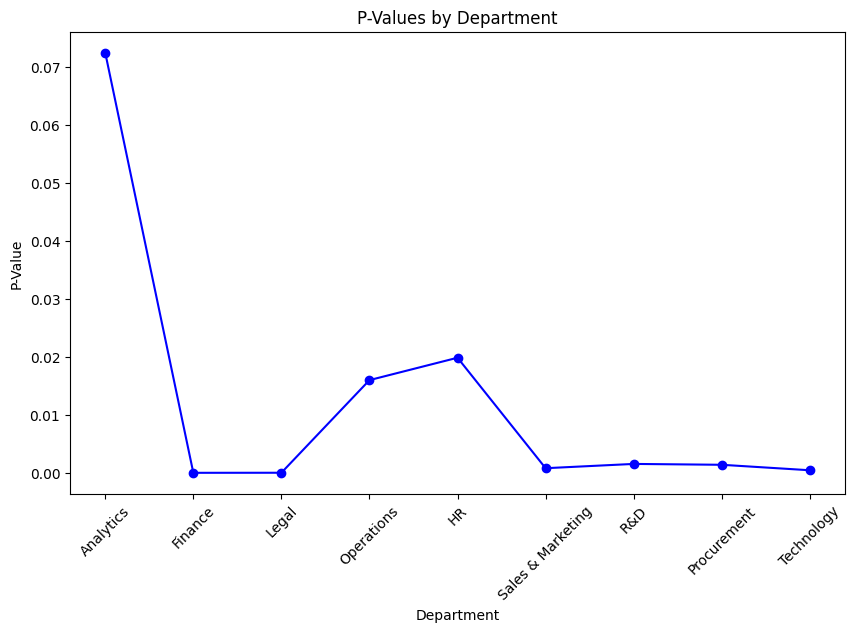

In [346]:
# Create a point plot of p-values by department
plt.figure(figsize=(10, 6))
plt.plot(results["Department"],results["p_values"],color='blue',marker='o')
plt.title("P-Values by Department")
plt.xlabel("Department")
plt.ylabel("P-Value")
plt.xticks(rotation=45)
plt.show()
